# Исследование объявлений о продаже квартир

**Цель исследования:** определить рыночную стоимость объектов недвижимости.

**Инструменты:** .

**Библиотеки:** seaborn, matplotlib

**Описание данных:** данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Содержание**
1. [Открытие данных](#open)
2. [Предобработка данных](#preprocessing)
3. [Исследовательский анализ данных](#analysis)
    * 3.1. [Параметры объектов](#parameters)
        * 3.1.1. [общая площадь](#square)
        * 3.1.2. [жилая площадь](#living_area)
        * 3.1.3. [площадь кухни](#kitchen_area)
        * 3.1.4. [цена объекта](#last_price)
        * 3.1.5. [количество комнат](#rooms)
        * 3.1.6. [высота потолков](#ceiling_height)
        * 3.1.7. [этаж квартиры](#floor)
        * 3.1.8. [тип этажа квартиры](#floor_type)
        * 3.1.9. [общее количество этажей в доме](#floors_total)
        * 3.1.10. [расстояние до центра города в метрах](#cityCenters_nearest)
        * 3.1.11. [расстояние до ближайшего аэропорта](#airports_nearest)
        * 3.1.12. [расстояние до ближайшего парка](#parks_nearest)
        * 3.1.13. [день и месяц публикации объявления](#weekday)
        * 3.1.14. [Динамика продажи квартиры](#days_exposition)
    * 3.2. [Факторы, влияющие на стоимость квартиры](#factors)
        * 3.2.1. [Зависимость цены от общей площади ### 3.2. Факторы, влияющие на стоимость квартиры](#last_price_total_area)
        * 3.2.2. [Зависимость цены от жилой площади](#last_price_living_area)
        * 3.2.3. [Зависимость цены от площади кухни](#last_price_kitchen_area)
        * 3.2.4. [Зависимость цены от количества комнат](#last_price_rooms)
        * 3.2.5. [Зависимость цены от этажа, на котором расположена квартира](#last_price_floor_type)
        * 3.2.6. [Зависимость цены от даты размещения (день недели, месяц, год)](#last_price_weekday)
    * 3.3. [Средняя стоимость одного квадратного метра в разных населенных пунктах](#price_for_m2)
    * 3.4. [Средняя стоимость одного квадратного метра в Санкт-Петербурге в зависимости от расположения квартиры](#price_for_m2_spb)
4. [Общий вывод](#conclusion)

## 1. Открытие данных<a class="anchor" id="open"></a>

In [3]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn
import missingno as msno

In [3]:
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

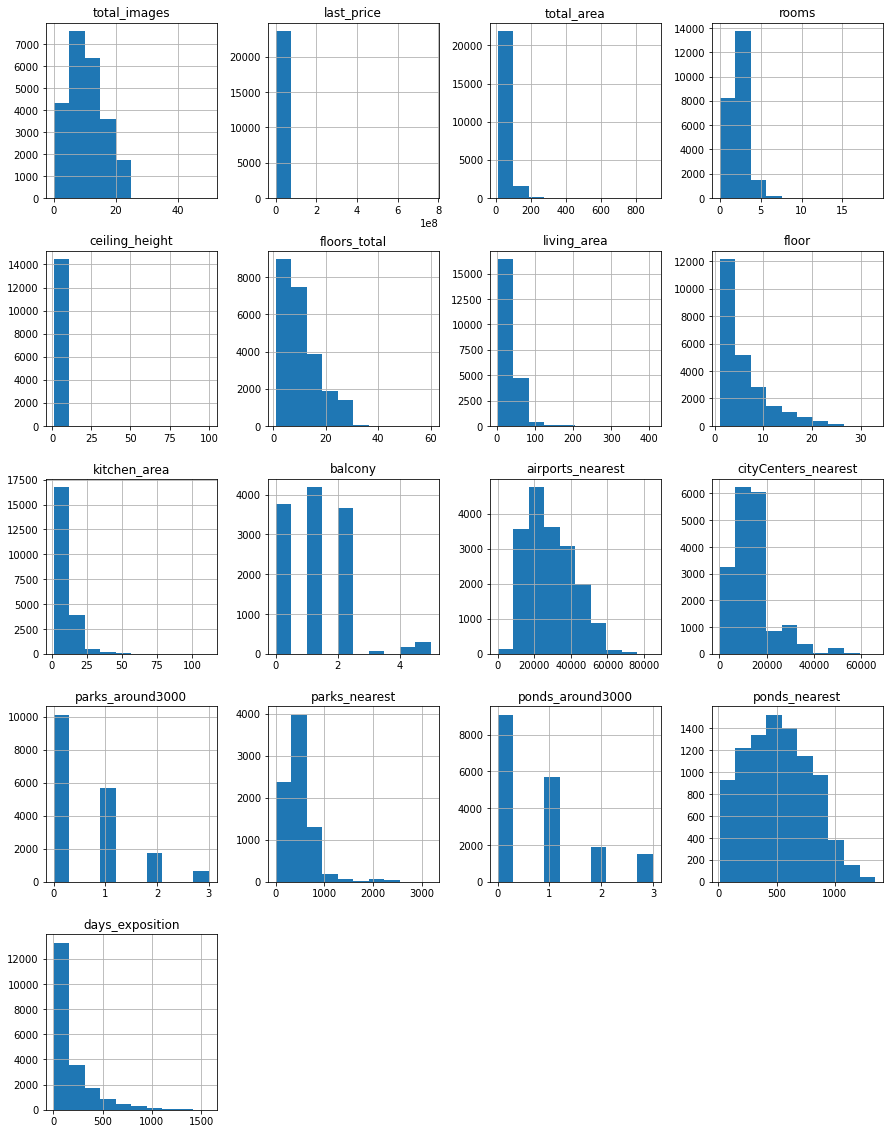

In [6]:
data.hist(figsize=(15,20))
plt.show()

**Вывод:**
Стали известны значения, по которым стоит проводить анализ данных. По первоначальным гистограммам можно сказать, что есть большой разброс данных в last_price, total_area, rooms, ceiling_height, living_area, days_exposition

## 2. Предобработка данных<a class="anchor" id="preprocessing"></a>

### 2.1. Пропуски

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Более наглядно пропуски можно посмотреть на матрице:

<AxesSubplot:>

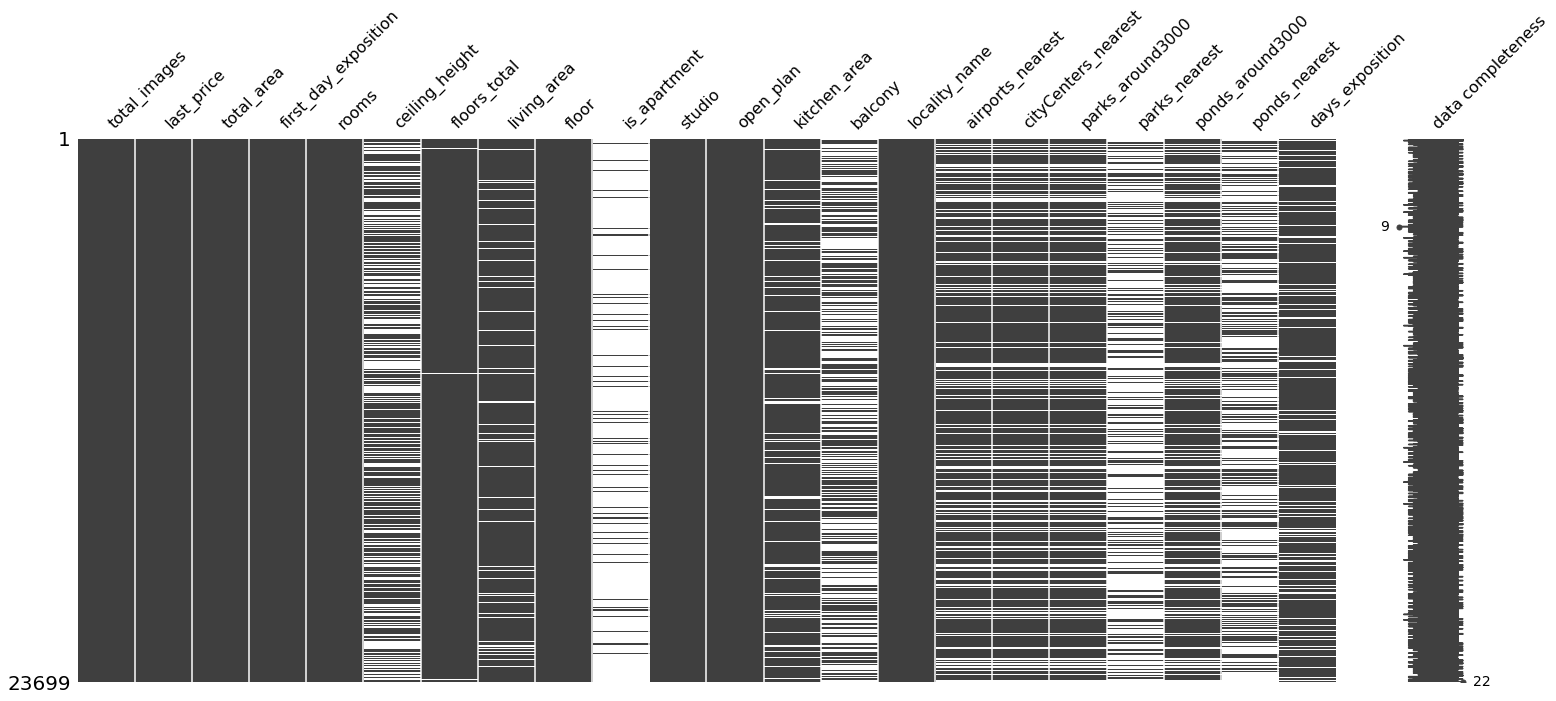

In [8]:
msno.matrix(data, labels=True)

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Чтобы вывести пропуски на графике ты можешь использовать такую библиотеку `https://russianblogs.com/article/5001266235/`- **<font color="maroon">- посмотрела, добавила</font>**
</div 

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Спасибо за графики. 
</div 

**Пропуски содержатся в:** 

* ceiling_height - можно заменить медианой в зависимости от расстояния от центра
* airports_nearest, cityCenters_nearest, parks_nearest - можно заменить медианой по населенному пункту
* balcony - скорее всего говорит об отсутсвии балкона в квартире, т.е. заменить на 0
* is_apartment - отсутсвие данных скорее всего говорит, что это не апартаменты, т.е. заменить на False
* living_area - как как отношение total_area*ratio, где ratio = известное living_area/total_area
* kitchen_area - как разница между total_area и living_area 
* days_exposition - заполнить никак нельзя; floors_total - не следует заменять медианой, поскольку исказятся значения

**Удалить столбцы:**
* locality_name - незначительное количество пропусков, так как это важные данные и заменить их ничем нельзя, то столбец придется удалить - это не повлияет на общий профиль
* parks_around3000, ponds_around3000, ponds_nearest, total_images, open_plan - никак не влияют на общий профиль и цену квартир

In [9]:
#удалим пропуски в название местности
data = data.dropna(subset = ['locality_name'])

In [10]:
#удалим ненужные столбцы
data = data.drop(labels=['parks_around3000', 'ponds_around3000', 'ponds_nearest', 'total_images', 'open_plan'], axis=1)

In [11]:
#заполняем пропуски в наличии балконов
data['balcony'] = data['balcony'].fillna(0)

#проверка
data['balcony'].isna().sum()

0

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Сразу хочу обратить внимание на то, что ты заменила на "0", а не на 0. Чтобы в формате цифры оставить 0, то и меняй на 0 без кавычек. **<font color="maroon">- исправила</font>**
</div 

In [12]:
#отношение жилой площади к общей
data['ratio'] = data['living_area']/data['total_area']

#заполняем пропуски этого отношения с группировкой по комнатам
for room in data['rooms'].unique():
    median = data.loc[data['rooms'] == room, 'ratio'].median()
    data.loc[(data['rooms'] == room) & (data['ratio'].isna()), 'ratio'] = median
    
#заполняем пропуски, где пропущены значения living_area, считаем как отношение total_area*ratio
data.loc[data['living_area'].isna(), 'living_area'] = data.loc[data['living_area'].isna(), 'total_area'] * data.loc[data['living_area'].isna(), 'ratio']

#проверка
data['living_area'].isna().sum()

0

In [13]:
#заполняем пропуски в kitchen_area как разница между total_area и living_area
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data.loc[data['kitchen_area'].isna(), 'total_area'] - data.loc[data['kitchen_area'].isna(), 'living_area']

#проверка
data['kitchen_area'].isna().sum()

0

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Здесь отлично вышло. 
</div 

In [14]:
#посмотрим уникальные названия местности
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [15]:
#избавимся от дубликатов в названиях местности
name = ['посёлок', 'городской', 'поселок', 'городского типа', 'деревня', 'садовое товарищество', 'село', 'садоводческое некоммерческое товарищество', 'при железнодорожной станции', 'коттеджный']
for element in name:
        data['locality_name'] = data['locality_name'].str.replace(element, '').str.strip()
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Простой и автоматизированный способ замены неявных дублей. 
</div 

In [16]:
# заполним пропуски в parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, 
# airports_nearest, cityCenters_nearest, floors_total как медиана этого значения по населенному пункту
for area in data['locality_name'].unique():
    #заполним пропуски в парках
    data.loc[(data['locality_name'] == area) & (data['parks_nearest'].isna()), 'parks_nearest'] = \
    data.loc[(data['locality_name'] == area), 'parks_nearest'].median()
    
    #заполним пропуски для аэропорта
    data.loc[(data['locality_name'] == area) & (data['airports_nearest'].isna()), 'airports_nearest'] = \
    data.loc[(data['locality_name'] == area), 'airports_nearest'].median()
    
    #заполним пропуски для центра
    data.loc[(data['locality_name'] == area) & (data['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = \
    data.loc[(data['locality_name'] == area), 'cityCenters_nearest'].median()
    

#заполним оставшиеся пропуски в этих значниях как медиана по всем населнным пунктам
data.loc[data['parks_nearest'].isna(), 'parks_nearest'] = data['parks_nearest'].median()
data.loc[data['airports_nearest'].isna(), 'airports_nearest'] = data['airports_nearest'].median()
data.loc[data['cityCenters_nearest'].isna(), 'cityCenters_nearest'] = data['cityCenters_nearest'].median()

#проверка
data.isna().sum()

last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area                 0
floor                       0
is_apartment            20890
studio                      0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest            0
cityCenters_nearest         0
parks_nearest               0
days_exposition          3180
ratio                       0
dtype: int64

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Вот тут я согласен со всем, кроме замены этажей. Таким образом ты заменишь так, что у тебя замененные значения будут меньше текущего этажа квартиры, а это противоречит смыслу. Тут лучше оставить пропуски как есть, все равно их мало. **<font color="maroon">- исправила</font>**
</div 

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Совсем другое дело. 
</div 

In [17]:
#найдем минимальное и максимальное значение cityCenters_nearest для создания функции
print(data['cityCenters_nearest'].min())
print(data['cityCenters_nearest'].max())

181.0
65968.0


In [18]:
#создадим функцию, которая будет определять, насколько близко находится квартира к центру, 
#где Категория 1 - близко, Категория 4 - далеко
def categorize_area(distance):
    try:
        if 0 <= distance <= 10000:
            return 'Категория 1'
        elif 10001 <= distance <= 30000:
            return 'Категория 2'
        elif 30001 <= distance <= 500000:
            return 'Категория 3'
        elif distance >= 500001:
            return 'Категория 4'
    except:
        pass

In [19]:
#применим функцию
data['category_of_area'] = data['cityCenters_nearest'].apply(categorize_area)
data.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_nearest,days_exposition,ratio,category_of_area
0,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000,8,NaN,False,25.000,0.0,Санкт-Петербург,18863.0,16028.0,482.0,NaN,0.472222,Категория 2
1,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.600,1,NaN,False,11.000,2.0,Шушары,12817.0,18603.0,460.0,81.0,0.460396,Категория 2
2,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.300,4,NaN,False,8.300,0.0,Санкт-Петербург,21741.0,13933.0,90.0,558.0,0.612500,Категория 2
3,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,100.435,9,NaN,False,58.565,0.0,Санкт-Петербург,28098.0,6800.0,84.0,424.0,0.631667,Категория 1
4,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000,13,NaN,False,41.000,0.0,Санкт-Петербург,31856.0,8098.0,112.0,121.0,0.320000,Категория 1


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Достаточно хороший метод категоризации. 
</div 

In [20]:
#заполним пропуски в ceiling_height как медиана с группировкой по километрам до центра
for area in data['category_of_area'].unique():
    data.loc[(data['category_of_area'] == area) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['category_of_area'] == area), 'ceiling_height'].median()
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

#проверка
data['ceiling_height'].isna().sum()

0

In [21]:
#заполним пропуски в is_apartment

data.loc[data['is_apartment'].isna(), 'is_apartment'] = False

#проверка
data.isna().sum()

last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total              85
living_area                0
floor                      0
is_apartment               0
studio                     0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_nearest              0
days_exposition         3180
ratio                      0
category_of_area           0
dtype: int64

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
С этим тоде спорить не буду. Супер.

</div 

**Вывод:** Остались пропуски в days_exposition и в floors_total, которые никак нельзя заменить логически. 

#### Типы данных

In [22]:
# поменяем типы данных

data['rooms'] = data['rooms'].astype('int8')
data['balcony'] = data['balcony'].astype('int8')
data['floor'] = data['floor'].astype('int8')

data['is_apartment'] = data['is_apartment'].astype('bool')

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            23650 non-null  float64       
 1   total_area            23650 non-null  float64       
 2   first_day_exposition  23650 non-null  datetime64[ns]
 3   rooms                 23650 non-null  int8          
 4   ceiling_height        23650 non-null  float64       
 5   floors_total          23565 non-null  float64       
 6   living_area           23650 non-null  float64       
 7   floor                 23650 non-null  int8          
 8   is_apartment          23650 non-null  bool          
 9   studio                23650 non-null  bool          
 10  kitchen_area          23650 non-null  float64       
 11  balcony               23650 non-null  int8          
 12  locality_name         23650 non-null  object        
 13  airports_nearest

**Вывод:** Удалив несколько столбцов и изменив тип данных на int8, память уменьшилась с *memory usage: 3.7+ MB* до *memory usage: 2.8+ MB*. Также изменили тип данных, где используется дата, для удобного дальнейшего анализа.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Вот тут отдельно похвалю тебя за то, что экономишься вычислительную память 
</div 

#### Аномалии

In [23]:
data.describe()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_nearest,days_exposition,ratio
count,2.365000e+04,23650.000000,23650.000000,23650.000000,23565.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,20470.000000,23650.000000
mean,6.541127e+06,60.329069,2.070106,2.733906,10.675875,34.681866,5.893277,11.739752,0.591712,29071.212643,14221.275645,471.917019,180.753200,0.564903
std,1.089640e+07,35.661808,1.078620,0.993491,6.594823,22.843491,4.883317,8.229041,0.959662,11697.072771,7682.753628,203.703786,219.777916,0.102764
min,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,181.000000,1.000000,1.000000,0.021583
25%,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.700000,2.000000,7.200000,0.000000,21160.000000,10939.000000,460.000000,45.000000,0.491339
50%,4.650000e+06,52.000000,2.000000,2.600000,9.000000,30.000000,4.000000,9.800000,0.000000,27223.000000,13270.000000,460.000000,95.000000,0.571429
75%,6.799000e+06,69.700000,3.000000,2.770000,16.000000,42.318750,8.000000,13.000000,1.000000,35841.000000,15743.000000,460.000000,231.000000,0.633484
max,7.630000e+08,900.000000,19.000000,100.000000,60.000000,430.133948,33.000000,255.702684,5.000000,84869.000000,65968.000000,3190.000000,1580.000000,1.000000


<AxesSubplot:>

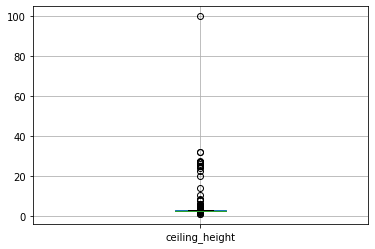

In [24]:
#построим диаграмму размаха для высоты потолка
data.boxplot(column = 'ceiling_height')

In [25]:
#заменим ошибки в записи высоты, поделив значения, которые больше 10 м, на 10.
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data.loc[data['ceiling_height'] > 10, 'ceiling_height']/10
print(sorted(data['ceiling_height'].unique().round(1)))

[1.0, 1.0, 1.2, 1.4, 1.8, 2.0, 2.2, 2.2, 2.3, 2.3, 2.3, 2.4, 2.4, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.1, 3.1, 3.1, 3.1, 3.1, 3.1, 3.1, 3.1, 3.1, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.7, 3.7, 3.7, 3.7, 3.7, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.9, 3.9, 3.9, 3.9, 3.9, 4.0, 4.0, 4.0, 4.1, 4.1, 4.1, 4.2, 4.2, 4.2, 4.2, 4.3, 4.4, 4.4, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.2, 5.3, 5.5, 5.6, 5.8, 6.0, 8.0, 8.3, 10.0]


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
И от выбивающихся значений избавились. 
</div 

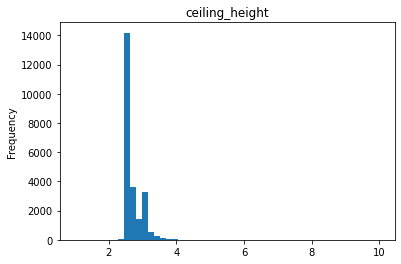

In [26]:
data['ceiling_height'].plot(bins=50, title='ceiling_height', kind='hist')
plt.show()

Минимальной нормой считается высота потолка 2,4 м. Максимум возьмем до 4 м.

<AxesSubplot:>

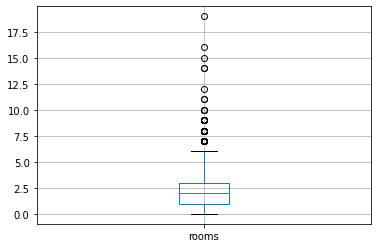

In [27]:
# проверка аномалий в количестве комнат
data.boxplot(column='rooms')

In [28]:
sorted(data['rooms'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 19]

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Ты очень часто выводишь результат командой print(). Это делать необязательно, когда у тебя код в последней ячейке, то вывод сработает и без print() **<font color="maroon">- ок ок!</font>**
</div 

Максимум возьмем по правому усу - 6 комнат.

<AxesSubplot:>

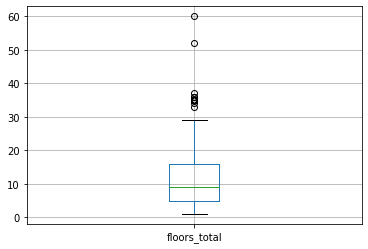

In [29]:
# проверка аномалий в количестве этажей
data.boxplot(column='floors_total')

In [30]:
print(sorted(data['floors_total'].unique()))

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, nan, 28.0, 29.0, 33.0, 34.0, 35.0, 36.0, 37.0, 52.0, 60.0]


Самое высокое жилое здание в Санкт-Петербурге состоит из 37 этажей. Максимум возьмем по правому усу, примерно 29 этаж.

<AxesSubplot:>

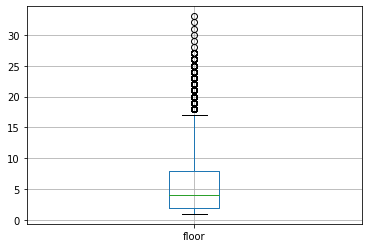

In [31]:
# проверка аномалий в floor
data.boxplot(column = 'floor')

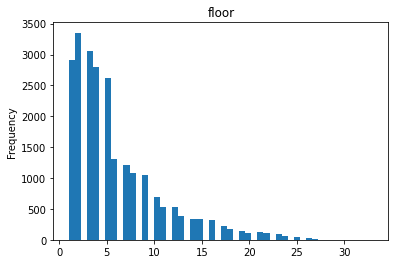

In [32]:
data['floor'].plot(bins=50, title='floor', kind='hist')
plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Видим, что типовая застройка преобладает. 
</div 

In [7]:
data = data.query('2.4 <=ceiling_height <=4 and rooms<=6 and floors_total<=29 and floor<=18')
data.shape[0]

13964

Удалили несколько разбросов в значениях, сократив таблицу на 968 строк (примерно 1%)

### Новые столбцы в таблице

In [34]:
#цена одного квадратного метра
data['price_for_m2'] = data['last_price']/data['total_area']

#день недели публикации объявления, где 0 — понедельник, 1 — вторник и так далее)
data['weekday'] = data['first_day_exposition'].dt.weekday

#месяц публикации объявления
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month

#год публикации объявления
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [35]:
#создаем функцию для категоризации квартиры по этажам
def floor_type(data):
    if data['floor']==1:
        return 'первый'
    elif data['floor']==data['floors_total']:
        return 'последний'
    else:
        return 'другой'

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Простая, удобная и понятная функция. 
</div 

In [36]:
#применим функцию и создадим новый столбец
data['floor_type'] = data.apply(floor_type, axis=1)
data.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,cityCenters_nearest,parks_nearest,days_exposition,ratio,category_of_area,price_for_m2,weekday,month,year,floor_type
0,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000,8,False,False,...,16028.0,482.0,NaN,0.472222,Категория 2,120370.370370,3,3,2019,другой
1,3350000.0,40.4,2018-12-04,1,2.60,11.0,18.600,1,False,False,...,18603.0,460.0,81.0,0.460396,Категория 2,82920.792079,1,12,2018,первый
2,5196000.0,56.0,2015-08-20,2,2.60,5.0,34.300,4,False,False,...,13933.0,90.0,558.0,0.612500,Категория 2,92785.714286,3,8,2015,другой
3,64900000.0,159.0,2015-07-24,3,3.00,14.0,100.435,9,False,False,...,6800.0,84.0,424.0,0.631667,Категория 1,408176.100629,4,7,2015,другой
4,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000,13,False,False,...,8098.0,112.0,121.0,0.320000,Категория 1,100000.000000,1,6,2018,другой


In [37]:
#расстояние до центра города в километрах
data['km'] = data['cityCenters_nearest'] // 1000
data.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_nearest,days_exposition,ratio,category_of_area,price_for_m2,weekday,month,year,floor_type,km
0,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000,8,False,False,...,482.0,NaN,0.472222,Категория 2,120370.370370,3,3,2019,другой,16.0
1,3350000.0,40.4,2018-12-04,1,2.60,11.0,18.600,1,False,False,...,460.0,81.0,0.460396,Категория 2,82920.792079,1,12,2018,первый,18.0
2,5196000.0,56.0,2015-08-20,2,2.60,5.0,34.300,4,False,False,...,90.0,558.0,0.612500,Категория 2,92785.714286,3,8,2015,другой,13.0
3,64900000.0,159.0,2015-07-24,3,3.00,14.0,100.435,9,False,False,...,84.0,424.0,0.631667,Категория 1,408176.100629,4,7,2015,другой,6.0
4,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000,13,False,False,...,112.0,121.0,0.320000,Категория 1,100000.000000,1,6,2018,другой,8.0


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
А вот теперь данные подготовлены к дальнешему исследования и можем идти дальше. 
</div 

### Исследовательский анализ данных

#### Параметры объектов

##### общая площадь

<AxesSubplot:>

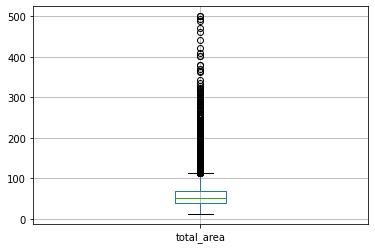

In [38]:
data.boxplot(column='total_area')

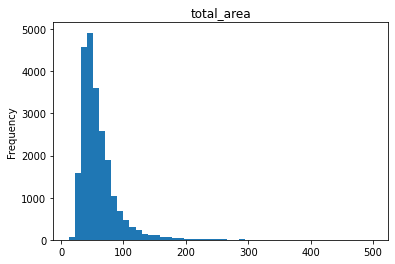

In [39]:
data['total_area'].plot(bins=50, title='total_area', kind='hist')
plt.show()

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Не забывай давать названия графикам. Так сразу будет понятно, что ты на них пытаешься показать. **<font color="maroon">- исправила здесь и далее</font>**
</div 

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Уже лучше графики выглядят.
</div 

In [40]:
data_total_area = data.query('total_area<220')

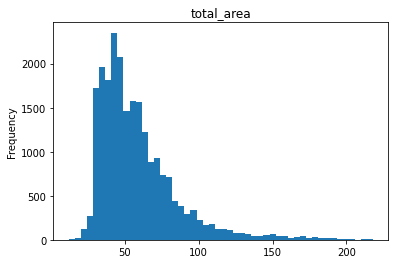

In [41]:
data_total_area['total_area'].plot(bins=50, title='total_area', kind='hist')
plt.show()

In [42]:
print(data_total_area['total_area'].mean())
print(data_total_area['total_area'].median())

58.27065566498092
52.0


Медиана и среднее общей площади схожи, т.е. разбросов в данных незначительное количество. Общая площадь в Санкт-Петербурге и соседних населённых пунктов за несколько лет примерно 58 м²

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Тут с выводом согласен.  
</div 

##### жилая площадь

<AxesSubplot:>

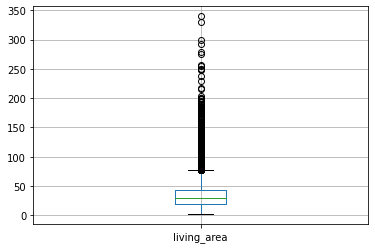

In [43]:
data.boxplot(column='living_area')

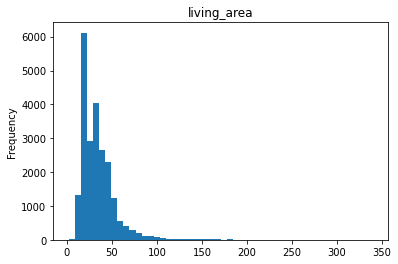

In [44]:
data['living_area'].plot(bins=50, title='living_area', kind='hist')
plt.show()

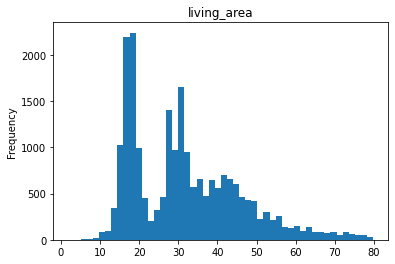

In [45]:
#избавимся от разбросов
data_living_area = data.query('living_area < 80')
data_living_area['living_area'].plot(bins=50, title='living_area', kind='hist')
plt.show()

In [46]:
print(data_living_area['living_area'].mean())
print(data_living_area['living_area'].median())

31.790702700790195
30.0


Прослеживается два пика: примерно 18 (возможно большое количество студий в данных) и 31 м². В общем, медиана и среднее жилой площади схожи, т.е. разбросов в данных незначительное количество. Жилая площадь в Санкт-Петербурге и соседних населённых пунктов за несколько лет примерно 31 м²

##### площадь кухни

<AxesSubplot:>

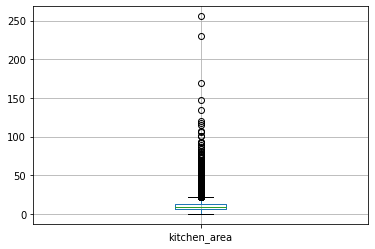

In [47]:
data.boxplot(column='kitchen_area')

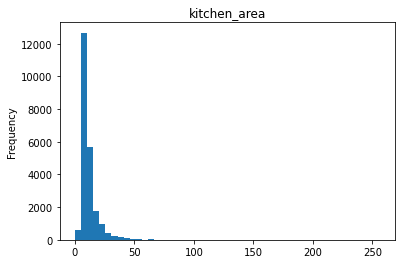

In [48]:
data['kitchen_area'].plot(bins=50, title='kitchen_area', kind='hist')
plt.show()

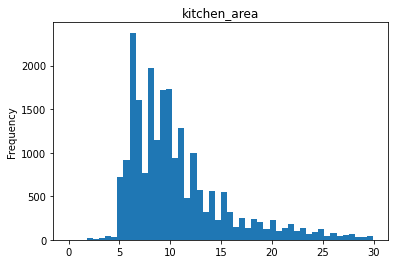

In [49]:
#избавимся от разбросов
data_kitchen_area = data.query('kitchen_area < 30')
data_kitchen_area['kitchen_area'].plot(bins=50, title='kitchen_area', kind='hist')
plt.show()

In [50]:
print(data_kitchen_area['kitchen_area'].mean())
print(data_kitchen_area['kitchen_area'].median())

10.61478370564339
9.3


Медиана и среднее площади кухонь схожи, т.е. разбросов в данных незначительное количество. Площадь кухонь в Санкт-Петербурге и соседних населённых пунктов за несколько лет примерно 10 м²

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Да кухни у нас небольшие выходят. 
</div 

##### цена объекта

<AxesSubplot:>

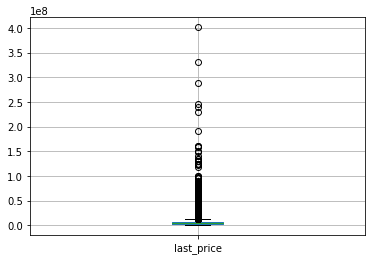

In [51]:
data.boxplot(column='last_price')

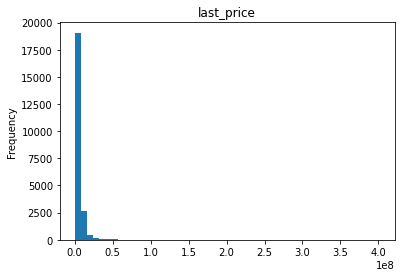

In [52]:
data['last_price'].plot(bins=50, title='last_price', kind='hist')
plt.show()

<AxesSubplot:>

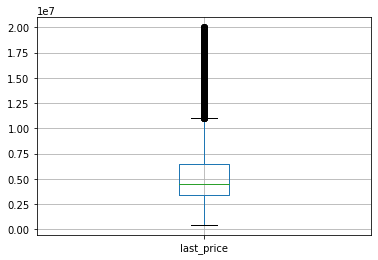

In [53]:
#избавимся от разбросов
data_last_price = data.query('last_price < 20000000')
data_last_price.boxplot(column='last_price')

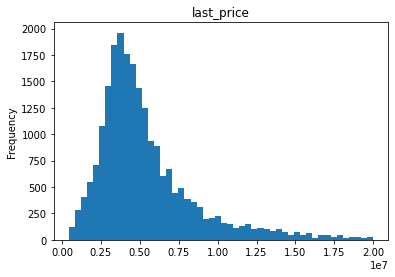

In [54]:
data_last_price['last_price'].plot(bins=50, title='last_price', kind='hist')
plt.show()

In [55]:
# во сколько раз сократили данные
data.shape[0]/data_last_price['last_price'].shape[0]

1.028365253698829

In [56]:
print(data_last_price['last_price'].mean())
print(data_last_price['last_price'].median())

5374244.898384315
4500000.0


Первоначально медиана и среднее цены различались почти в 2 раза, то есть разбросов в данных было значительное количество, из-за этого страдал общий профиль. Удалили 1% данных. И стала видна средняя цена за квартиры в Санкт-Петербурге и ближайших населенных пунктах: примерно 4,5 млн. руб.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
И тут спорить не стану. Все логично. 
</div 

##### количество комнат

<AxesSubplot:>

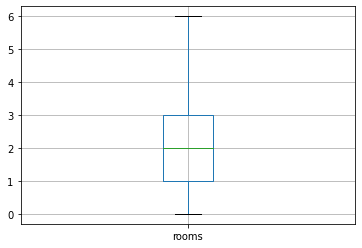

In [57]:
data.boxplot(column='rooms')

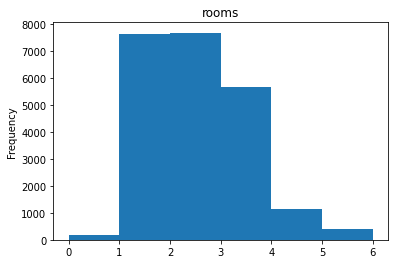

In [58]:
data['rooms'].plot(bins=6, title='rooms', kind='hist')
plt.show()

Чаще всего встречаются квартиры с 2 комнатами.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
И это тоже логично, соглашусь. 
</div 

##### высота потолков

<AxesSubplot:>

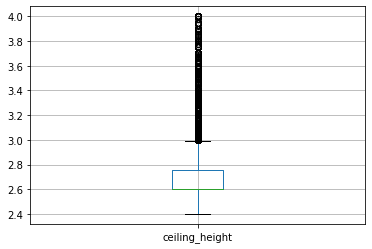

In [59]:
data.boxplot(column='ceiling_height')

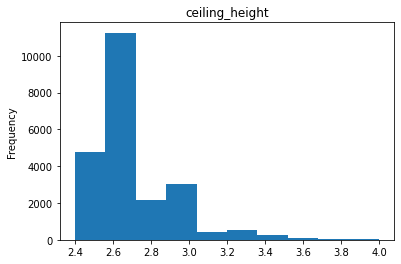

In [60]:
data['ceiling_height'].plot(bins=10, title='ceiling_height', kind='hist')
plt.show()

Средная высота потолка составляет 2,6 м

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Ну и тут данные соответствуют реальным. 
</div 

##### этаж квартиры

<AxesSubplot:>

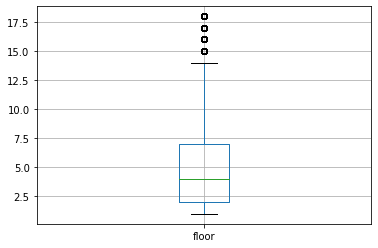

In [61]:
data.boxplot(column='floor')

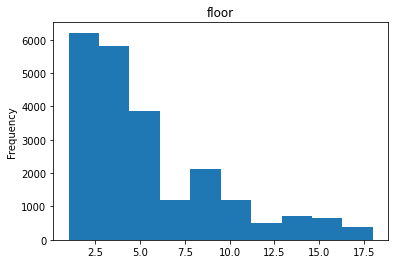

In [62]:
data['floor'].plot(bins=10, title='floor', kind='hist')
plt.show()

In [63]:
print(data['floor'].mean())
print(data['floor'].median())

5.378392691645704
4.0


Чаще всего квартиры продаются на 4-5 этажах.

##### тип этажа квартиры

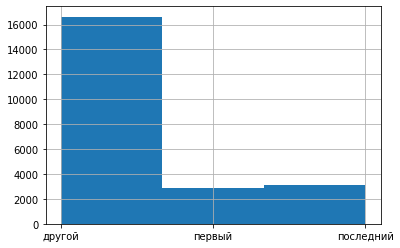

In [64]:
data['floor_type'].hist(bins=3)
plt.show()

Меньше всего можно встретить продажу квартир на первом или последнем этаже - спрос на них меньше.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Квартиры на первом этаже пользуются наименьшим спросом. 
</div 

##### общее количество этажей в доме

<AxesSubplot:>

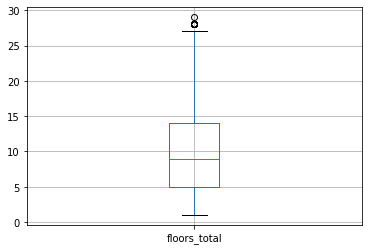

In [65]:
data.boxplot(column='floors_total')

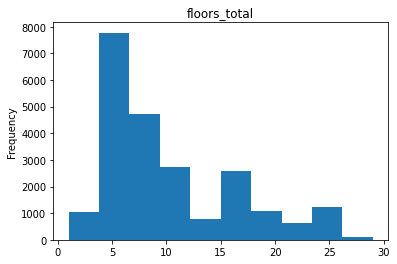

In [66]:
data['floors_total'].plot(bins=10, title='floors_total', kind='hist')
plt.show()

In [67]:
print(data['floors_total'].mean())
print(data['floors_total'].median())

10.247716139282405
9.0


В Санкт-Петербурге и его окрестностях чаще всего встречаются дома с 9-10 этажами.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Да, и это соответствует логике. 
</div 

##### расстояние до центра города в метрах

<AxesSubplot:>

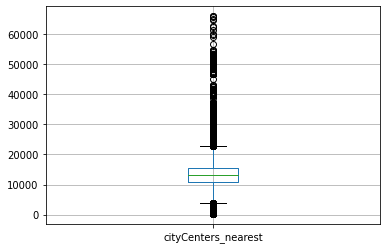

In [68]:
data.boxplot(column='cityCenters_nearest')

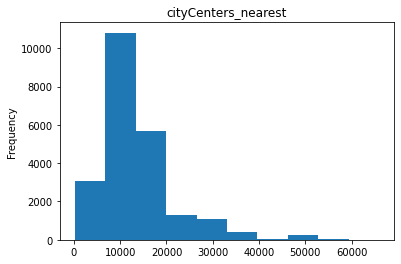

In [69]:
data['cityCenters_nearest'].plot(bins=10, title='cityCenters_nearest', kind='hist')
plt.show()

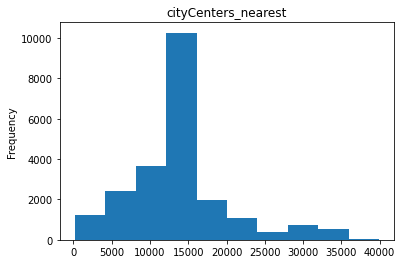

In [70]:
data_cityCenters_nearest = data.query('cityCenters_nearest < 40000')
data_cityCenters_nearest['cityCenters_nearest'].plot(bins=10, title='cityCenters_nearest', kind='hist')
plt.show()

Больше всего квартир продается недалеко от центра, поскольку они в основном пользуются спросом.

##### расстояние до ближайшего аэропорта

<AxesSubplot:>

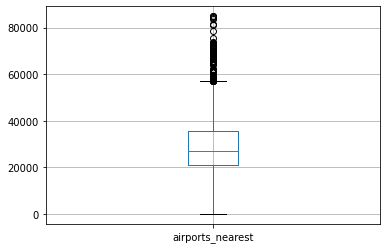

In [71]:
data.boxplot(column='airports_nearest')

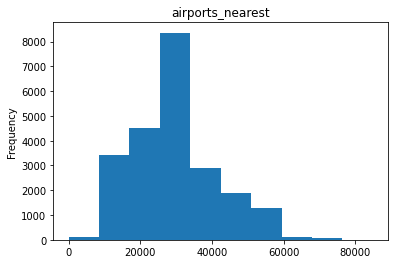

In [72]:
data['airports_nearest'].plot(bins=10, title='airports_nearest', kind='hist')
plt.show()

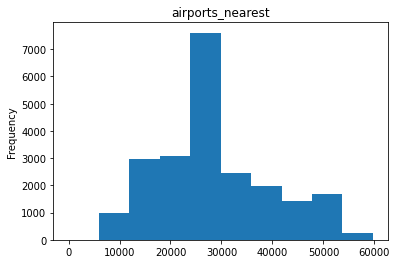

In [73]:
data_airports_nearest = data.query('airports_nearest < 60000')
data_airports_nearest['airports_nearest'].plot(bins=10, title='airports_nearest', kind='hist')
plt.show()

Чаще всего квартиры расположены в 25-30 км от аэропорта. 

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Не забывай только писать небольшие выводы по итогу разбора графиков. **<font color="maroon">- добавила</font>**
</div 

##### расстояние до ближайшего парка

<AxesSubplot:>

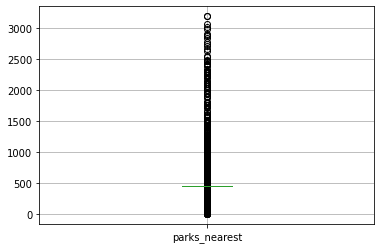

In [74]:
data.boxplot(column='parks_nearest')

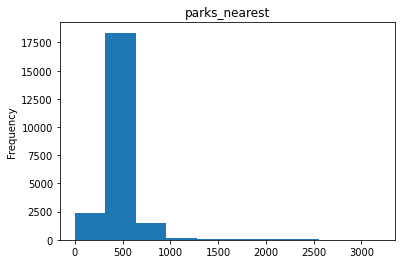

In [75]:
data['parks_nearest'].plot(bins=10, title='parks_nearest', kind='hist')
plt.show()

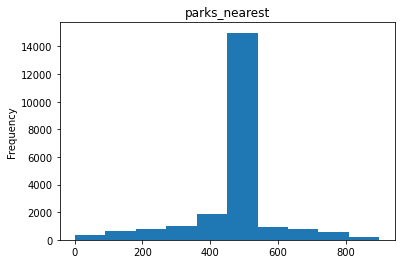

In [76]:
data_parks_nearest = data.query('parks_nearest < 900')
data_parks_nearest['parks_nearest'].plot(bins=10, title='parks_nearest', kind='hist')
plt.show()

Чаще всего квартиры находятся в 500 м от ближайшего парка - покупатели любят обращать на это внимание

##### день и месяц публикации объявления

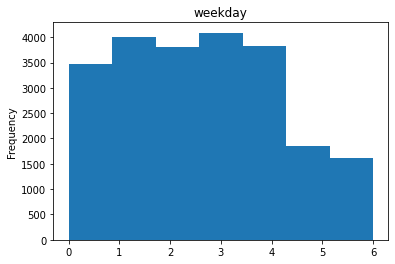

In [77]:
data['weekday'].plot(bins=7, title='weekday', kind='hist')
plt.show()

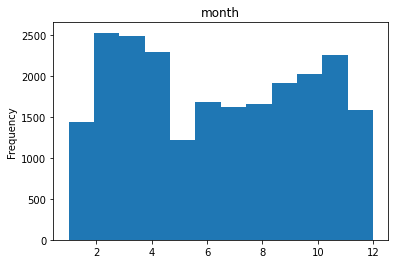

In [78]:
data['month'].plot(bins=12, title='month', kind='hist')
plt.show()

Чаще всего публикуют новые квартиры по будням. Также наблюдается тенденция, что квартиры имеют спрос с сентября(из-за приезда новых студентов и рабочих в этот период времени) и наблюдается пик весной. 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Все так и есть. Выходные являются причиной просадки количества публикуемых объявлений. 
</div 

#### динамика продажи квартиры

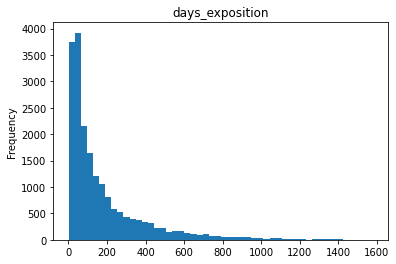

In [79]:
data['days_exposition'].plot(bins=50, title='days_exposition', kind='hist')
plt.show()

In [80]:
print(data['days_exposition'].mean())
print(data['days_exposition'].median())

print(data['days_exposition'].min())
print(data['days_exposition'].max())

180.42927127985303
95.0
1.0
1580.0


Быстрые продажи - продажи, которые были совершены в течение одного дня после публикации объявления.
Наблюдается большой разброс данных, поскольку медиана и среднее количество дней размещения рекламы отличаются в два раза. Проверим запись с наибольшим количеством дней в объявлении.

In [81]:
data.query('days_exposition == 1580.0')

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_nearest,days_exposition,ratio,category_of_area,price_for_m2,weekday,month,year,floor_type,km
18843,3500000.0,48.2,2014-12-15,2,2.5,5.0,27.4,2,False,False,...,460.0,1580.0,0.568465,Категория 2,72614.107884,0,12,2014,другой,13.0


Все значения для строки 18843 выглядят реальными, за исключением количеством дней размещения рекламы. Один из вариантов причины: продавец забыл убрать на сайте квартиру с продажи и из-за этого среднее значение исказилось. Возможно про это забыли и другие продавцы. Посмотрим диаграмму размаха.

<AxesSubplot:>

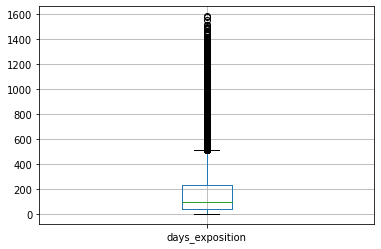

In [82]:
data.boxplot(column='days_exposition')

In [83]:
# возьмем значения days_exposition до 500
data = data.query('days_exposition < 500.0')
print(data['days_exposition'].mean())
print(data['days_exposition'].median())

126.77036375808972
84.0


Разница между средним и медианой уменьшилась и уже выглядит более реальным. Оставим такие данные.

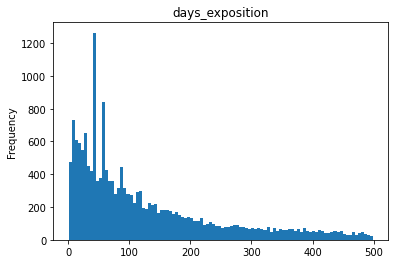

In [84]:
#посмотрим на диаграмму с сокращенными значениями
data['days_exposition'].plot(bins=100, title='days_exposition', kind='hist')
plt.show()

Стали видны пики, но не понятны их причины. Посмотрим более подробно: уменьшим до 100 дней и увеличим количество корзин.

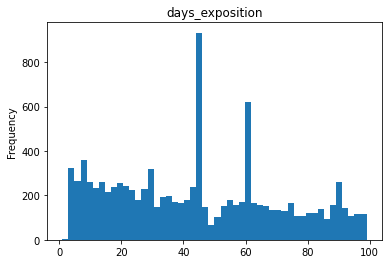

In [85]:
data_days_exposition = data.query('days_exposition < 100')
data_days_exposition['days_exposition'].plot(bins=50, title='days_exposition', kind='hist')
plt.show()

Наблюдаются пики на 30, 45, 60 и 90 дни. Скорее всего это автоматическое закрытие объявлений при условии, что продавец не продлил его - хорошее решения для получения корректных данных.

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Вот тут стоит рассмотреть график более подробно. У тебя на нем есть выбивающиеся значения. Как думаешь, откуда они взялись? 
</div 

<div class="alert alert-block alert-danger">
 
# Комментарий ревьюера ver.2 
    
#### Ошибка
    
Не вижу тут ответа на вопрос. Тут надо в графике построить большее число корзин и тогда ты увидишь выбивающиеся значения. Надо их пояснить. **<font color="maroon">- добавила</font>**
</div 

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.3 
    
#### Успех
    
Вот а теперь другое дело 
</div 

#### Факторы, влияющие на стоимость квартиры

##### Зависимость цены от общей площади

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

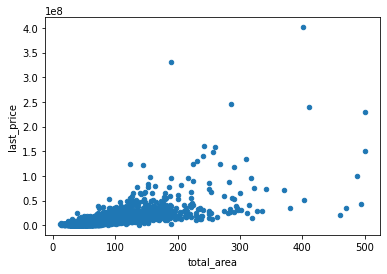

In [86]:
data.plot(x='total_area', y='last_price', kind='scatter')

(17780, 25)


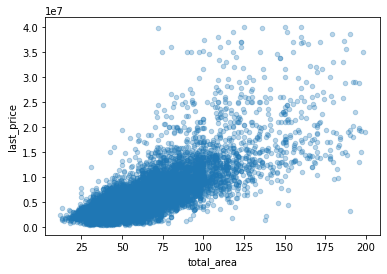

In [87]:
data_total_area_price = data.query('total_area<200 and last_price<40000000')
data_total_area_price.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3)
print(data_total_area_price.shape)

Зависимость цены от общей площади носит прямо пропорциональный характер. 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Классный метод для визуализации зависимости на графике. 
</div 

##### Зависимость цены от жилой площади

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

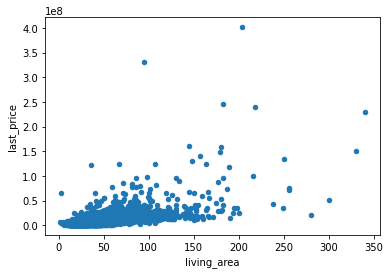

In [88]:
data.plot(x='living_area', y='last_price', kind='scatter')

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

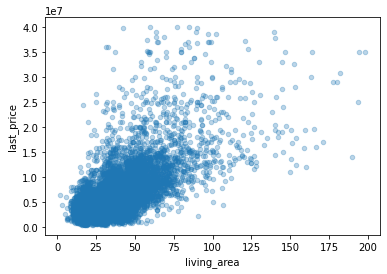

In [89]:
data_living_area_price = data.query('living_area<200 and last_price<40000000')
data_living_area_price.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3)

Зависимость цены от жилой площади носит прямо пропорциональный характер. 

##### Зависимость цены от площади кухни

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

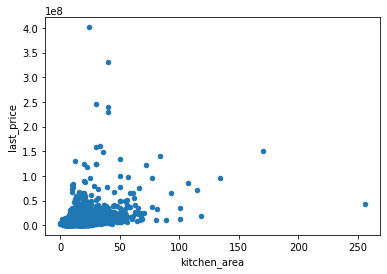

In [90]:
data.plot(x='kitchen_area', y='last_price', kind='scatter')

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

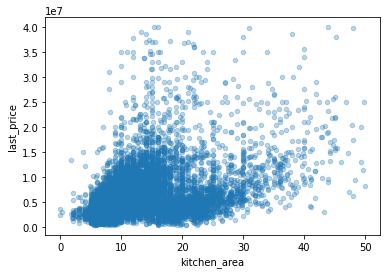

In [91]:
data_kitchen_area_price = data.query('kitchen_area<50 and last_price<40000000')
data_kitchen_area_price.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3, legend=True)

Цена от площади кухни не имеет зависимости. 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Да, можно сделать такой вывод. 
</div 

##### Зависимость цены от количества комнат

<AxesSubplot:xlabel='rooms'>

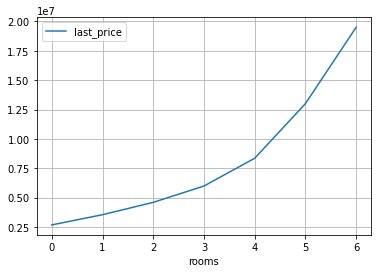

In [92]:
(
    data.pivot_table(index='rooms', values='last_price', aggfunc='median')
    .plot(grid=True)
)

Зависимость цены от количества комнат носит прямо пропорциональный характер. 

##### Зависимость цены от этажа, на котором расположена квартира

<AxesSubplot:xlabel='floor_type'>

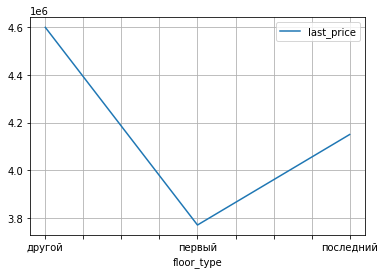

In [93]:
(
    data.pivot_table(index='floor_type', values='last_price', aggfunc = 'median')
    .plot(grid=True)
)

Цена зависит от этажа, на котором находится квартира. Так, покупатели предпочитают квартиры не на первом и не на последнем этажах, следовательно, чтобы увеличить спрос на этих квартиры, уменьшают стоимость.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Квартиры на первом этаже пользуются наименьшим спросом. 
</div 

##### Зависимость цены от даты размещения (день недели, месяц, год).

<AxesSubplot:xlabel='weekday'>

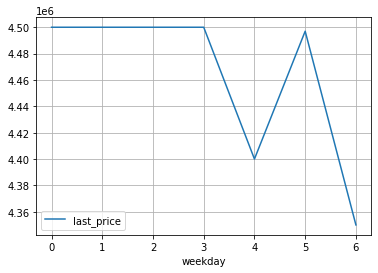

In [94]:
(
    data.pivot_table(index='weekday', values='last_price', aggfunc = 'median')
    .plot(grid=True)
)

<AxesSubplot:xlabel='month'>

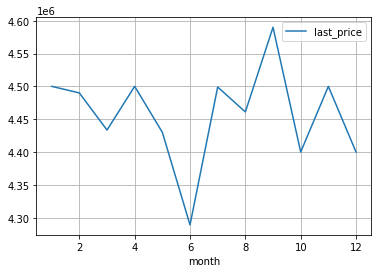

In [95]:
(
    data.pivot_table(index='month', values='last_price', aggfunc = 'median')
    .plot(grid=True)
)

Так как существует спрос на квартиры в апреле и в сентябре, то цены увеличиваются.

#### Средняя стоимость одного квадратного метра в разных населенных пунктах

In [96]:
best_price_for_m2 = data.groupby('locality_name') \
    .agg({'price_for_m2':['count', 'mean']}) \
    .sort_values(by=('price_for_m2','count'), ascending=False)
print('Средняя цена одного квадратного метра в топ-10 населённых пунктах:')

best_price_for_m2.head(10)


Средняя цена одного квадратного метра в топ-10 населённых пунктах:


price_for_m2               
                       count           mean
locality_name                              
Санкт-Петербург        11863  110889.029622
Мурино                   451   85669.642090
Кудрово                  363   94679.951304
Шушары                   355   77711.594001
Всеволожск               306   68489.697818
Колпино                  290   74710.045072
Пушкин                   276  101762.507903
Гатчина                  244   68065.179716
Парголово                219   87756.357710
Выборг                   190   57052.797096

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Вот и рейтинг по городам получили. 
</div 

In [97]:
high_price_for_m2 = best_price_for_m2['price_for_m2']['mean'].max().round(0)
locality_of_high_price_for_m2 = best_price_for_m2['price_for_m2']['mean'].idxmax()


low_price_for_m2 = best_price_for_m2['price_for_m2']['mean'].min().round(0)
locality_of_low_price_for_m2 = best_price_for_m2['price_for_m2']['mean'].idxmin()

print(f'Самая высокая стоимость квадратного метра в {locality_of_high_price_for_m2}е: {high_price_for_m2}')
print(f'Самая низкая стоимость квадратного метра в {locality_of_low_price_for_m2}: {low_price_for_m2}')

Самая высокая стоимость квадратного метра в Лисий Носе: 113728.0
Самая низкая стоимость квадратного метра в Старополье: 11206.0


#### Средняя стоимость одного квадратного метра в Санкт-Петербурге в зависимости от расположения квартиры

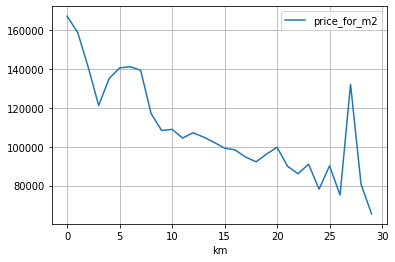

In [98]:
data_km = data.query('locality_name == "Санкт-Петербург"') \
    .pivot_table(index='km', values='price_for_m2') \
    .plot(grid=True)

Наблюдается обратная зависимость цены от увеличения расстояния от центра города.

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Как думаешь, а где заканчивается зона центра? **<font color="maroon">- добавила</font>**
</div 

По графику можно сказать, что центр заканчивается примерно на 7 км, поскольку наблюдается резкий спад цены.

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Да, так и есть. 
</div 

### Общий вывод

1. В данных содержалось большое количество пропусков. 
* Самая вероятная причина: нежелание продавцов заполнять значения для разных характеристик, так как они думают, что это неважные значения для продажи, например высота потолков, жилая площадь (если есть общая площадь) или площадь кухни. 
* Некоторые данные не были заполнены, поскольку предполагали отсутсвие значения, например, наличие балкона.
* Отсутствовали многие картографические данные. Вероятно заполняли адрес не по шаблону, и система не находила его на карте. таким образом, не могла посмотреть ближайшее расстояние.

Однако, многие пропуски удалось заменить медианой по групировке населенного пункта или дальности от центра. Чтобы минимизировать пропуски, стоит рассмотреть заполнение объявления и добавить обязательные поля.

2. Больше всего объявлений за несколько лет было выставлено в Санкт-Петербурге и в Мурино, Кудрово и Шушары, поскольку это ближайшие города-спутники к Санкт-Петербургу. 
Рыночная стоимость квартир носит несколько зависимостей:
* прямо пропорциональный характер: цена-общая площадь; цена-жилая площадь, цена-количество комнат
* обрато пропорциональный характер: цена-расстояние от центра
* наблюдается тенденция спроса квартир в апреле и сентябре, следовательно, идет увеличение стоимости квартир
* цена квартир, которые находятся на первом или последнем этажах, ниже других, поскольку спрос на данные квартиры меньше

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Вывод получился достаточно лаконичный. Рекомендую тебе здесь добавить еще рекомендации. Вот у тебя в работе было много пропусков. Как думаешь, что стоит сделать, чтобы минимизировать их в другой раз? **<font color="maroon">- добавила</font>**
</div 

<div class="alert alert-block alert-success">
 
### Итоговый комментарий ревьюера
    
#### Успех
    
Благодарю тебя за такой классный проект. Видно, что у тебя есть хорошая база, при помощи который ты здорово справилась с работой. Отдельно хочу похвалить за работу с графиками. Отдельного внимания заслуживает раздел по проверке Знакомству с данными и Предобработке данных. А еще классный вывод получился и написание функций.
    
Но в работе есть замечания, которые надо будет поправить: 
    
* Исправить замену пропусков по этажам. 
* Пояснить выбивающиеся значения по графику. 
  
    
А еще, я оставил в работе рекомендации. Надеюсь, они тебе помогут в дальнейшем.
    
Буду ждать проект после доработок. Удачи. 
</div 

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод